In [43]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [44]:
# Clase One vs All
class OvAClassifier(BaseEstimator):
    def __init__(self):
        self.models = []
        self.classes_ = None

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.models = []
        for cls in self.classes_:
            y_binary = (y == cls).astype(int)
            model = LogisticRegression()
            model.fit(X, y_binary)
            self.models.append(model)

    def predict(self, X):
        probs = np.array([model.predict_proba(X)[:, 1] for model in self.models])
        predictions = self.classes_[np.argmax(probs, axis=0)]
        return predictions

In [50]:
# Cargar dataset Iris y seleccionar solo petal length y petal width
iris = load_iris()
X = iris.data[:, [2, 3]]  # petal length, petal width
y = iris.target
feature_names = [iris.feature_names[i] for i in [2, 3]]
target_names = iris.target_names

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Estandarizar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_all_scaled = scaler.transform(X)

# Mostrar resultados
print("Predicciones del conjunto de prueba:")
print(y_pred)
print("Etiquetas verdaderas:")
print(y_test)

Predicciones del conjunto de prueba:
[2 1 1 2 2 2 1 1 0 2 0 0 2 2 0 2 1 0 0 0 1 0 1 2 2 1 1 1 1 0 1 2 1 0 2 0 0
 0 0 2 1 0 2 2 1]
Etiquetas verdaderas:
[2 1 2 1 2 2 1 1 0 2 0 0 2 2 0 2 1 0 0 0 1 0 1 2 2 1 1 1 1 0 2 2 1 0 2 0 0
 0 0 1 1 0 2 2 1]


In [48]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [49]:
# Entrenar modelo OvAClassifier
ova = OvAClassifier()
ova.fit(X_train_scaled, y_train)
y_pred = ova.predict(X_test_scaled)

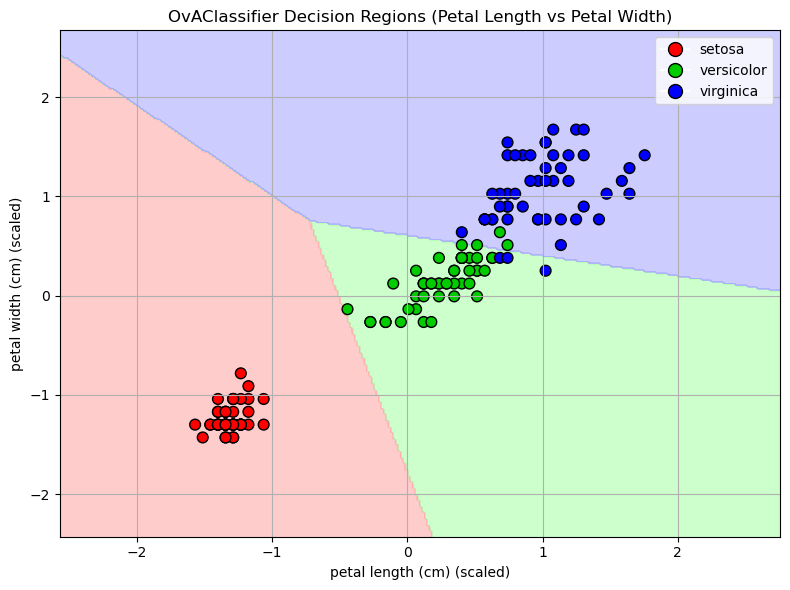

In [51]:
# Crear malla para regiones de decisión
x_min, x_max = X_all_scaled[:, 0].min() - 1, X_all_scaled[:, 0].max() + 1
y_min, y_max = X_all_scaled[:, 1].min() - 1, X_all_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)
grid = np.c_[xx.ravel(), yy.ravel()]
Z = ova.predict(grid)
Z = Z.reshape(xx.shape)

# Colores para regiones y puntos
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00CC00', '#0000FF'])

# Graficar regiones de decisión
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
plt.scatter(
    X_all_scaled[:, 0], X_all_scaled[:, 1],
    c=y, cmap=cmap_bold, edgecolor='k', s=60
)
plt.xlabel(f"{feature_names[0]} (scaled)")
plt.ylabel(f"{feature_names[1]} (scaled)")
plt.title("OvAClassifier Decision Regions (Petal Length vs Petal Width)")
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label=target_names[i],
               markerfacecolor=cmap_bold(i), markersize=10, markeredgecolor='k')
    for i in range(len(target_names))
])
plt.grid(True)
plt.tight_layout()
